<a href="https://www.kaggle.com/code/jameelsawafta/email-spam-classification-using-svm?scriptVersionId=126002722" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Email Spam Classification using SVM

This project is an implementation of a **Support Vector Machine (SVM)** classifier to classify emails as spam or non-spam

## Overview
The aim of this project is to develop a machine learning model that can accurately classify emails as spam or non-spam using the SVM algorithm. The model is trained on a dataset of labeled emails.

The project consists of the following components:

* Data Loading and Exploration
* Data Preprocessing
* Feature Extraction
* Model Training and Evaluation
* Model Testing

## Requirements
To get started with this project, you will need to install Python and the following libraries:

* pandas
* numpy
* scikit-learn
* matplotlib
* nltk

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords

In [2]:
email_df = pd.read_csv('/kaggle/input/spam-email/spam.csv')

In [3]:
email_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email_df['Category']=email_df.Category.apply(lambda x: 1 if x=="spam" else 0)

In [5]:
email_df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
email_df.shape

(5572, 2)

In [7]:
email_df.drop_duplicates(inplace=True)

In [8]:
email_df.shape

(5157, 2)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data preprocessing
In this section, we preprocess the data to prepare it for training the model. We perform tasks such as removing stop words.

In [10]:
def procrss_text(text):
    nopunc = [char for char in text ]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return nopunc

In [11]:
# convert a collection of text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=procrss_text).fit_transform(email_df['Message'])

## Data Splitting
We split the dataset into a training set and a testing set with a ratio of 80:20. The training set was used to train the SVM model, while the testing set was used to evaluate its performance.

In [12]:
# split data to 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages_bow,email_df['Category'],test_size=0.20,random_state=42)

In [13]:
messages_bow.shape

(5157, 118)

In [14]:
from sklearn import svm,metrics

## Training
We trained an SVM model with a linear kernel on the training set using scikit-learn's **svm.SVC** function. We used a C value of 1.0 and set the class_weight parameter to 'balanced' to account for any class imbalance in the dataset.

In [15]:
classifier = svm.SVC(kernel='linear').fit(x_train,y_train)

In [16]:
pred = classifier.predict(x_test)
print(metrics.classification_report(y_test,pred))
print(f"accuracy score = {metrics.accuracy_score(y_test,pred)}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       896
           1       0.93      0.95      0.94       136

    accuracy                           0.98      1032
   macro avg       0.96      0.97      0.97      1032
weighted avg       0.98      0.98      0.98      1032

accuracy score = 0.9844961240310077


## Evaluation
We evaluated the performance of the SVM model on the testing set using scikit-learn's metrics.accuracy_score function. We obtained an accuracy score of **0.9845**, indicating that the model is able to correctly classify almost 98.5% of the emails as either spam or non-spam.

In [17]:
cm = metrics.confusion_matrix(y_test,pred)
tp, tn, fp, fn = cm[1,1] , cm[0,0] , cm[0,1] , cm[1,0]
print(f"True Positive {tp}")
print(f"True Negative {tn}")
print(f"False Positive {fp}")
print(f"False Positive {fn}")

True Positive 129
True Negative 887
False Positive 9
False Positive 7


In [18]:
print(f"Precision score = {metrics.precision_score(y_test,pred)}")

Precision score = 0.9347826086956522


In [19]:
print(f"Recall score = {metrics.recall_score(y_test,pred)}")

Recall score = 0.9485294117647058


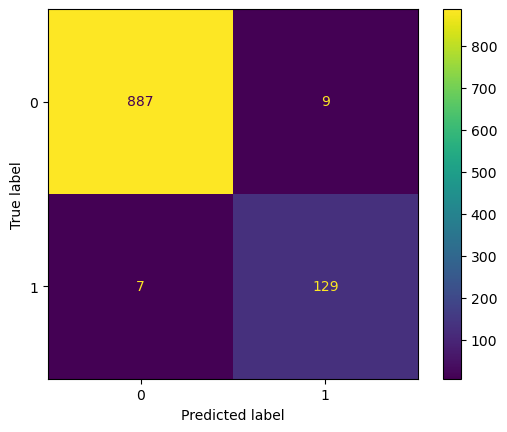

In [20]:
classes = np.unique(y_test)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes).plot()
plt.show()

## Conclusion
Based on our results, we can conclude that the SVM algorithm with a linear kernel is a promising approach for email spam classification. With an accuracy score of **0.9845**, the model is able to effectively distinguish between spam and non-spam emails. Further improvements can be made by tuning the model's hyperparameters or using different preprocessing techniques. Nonetheless, this report demonstrates that machine learning can be a powerful tool for addressing the problem of email spam.

Jameel Sawafta

jameelsawafta.wlar@gmail.com